In [1]:
from ozclim import tools
import xarray as xr 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# USER ADJUST HERE

region = "EAS"
month = 12
region_text = "Eastern Asia"
month_text = "December"

In [39]:
ar6_region = {
        "ENA": 5,
        "EAS": 35,
        "WCE": 17,
    }
    

ref_noland = tools.mask_ocean_c48(ref)
refSNOx_noland = tools.mask_ocean_c48(refSNOx)
refshort_noland = tools.mask_ocean_c48(refshort)
refSNOxshort_noland = tools.mask_ocean_c48(refSNOxshort)
polshort_noland = tools.mask_ocean_c48(polshort)
polSNOxshort_noland = tools.mask_ocean_c48(polSNOxshort)

ref_noland = ref_noland.resample(time='1M').mean(dim='time')
refSNOx_noland = refSNOx_noland.resample(time='1M').mean(dim='time')
refshort_noland = refshort_noland.resample(time='1M').mean(dim='time')
refSNOxshort_noland = refSNOxshort_noland.resample(time='1M').mean(dim='time')
polshort_noland = polshort_noland.resample(time='1M').mean(dim='time')
polSNOxshort_noland = polSNOxshort_noland.resample(time='1M').mean(dim='time')

ref_noland_region = tools.crop_regionmask_ar6_c48(ref_noland, region_num=ar6_region[region])
refSNOx_noland_region = tools.crop_regionmask_ar6_c48(refSNOx_noland, region_num=ar6_region[region])  
refshort_noland_region = tools.crop_regionmask_ar6_c48(refshort_noland, region_num=ar6_region[region])
refSNOxshort_noland_region = tools.crop_regionmask_ar6_c48(refSNOxshort_noland, region_num=ar6_region[region])  
polshort_noland_region = tools.crop_regionmask_ar6_c48(polshort_noland, region_num=ar6_region[region])    
polSNOxshort_noland_region = tools.crop_regionmask_ar6_c48(polSNOxshort_noland, region_num=ar6_region[region])   

ref_noland_region_month = ref_noland_region['SpeciesConc_O3'].sel(time=ref_noland_region.time.dt.month.isin(month)).isel(lev=0, region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])
refSNOx_noland_region_month = refSNOx_noland_region['SpeciesConc_O3'].sel(time=refSNOx_noland_region.time.dt.month.isin(month)).isel(lev=0, region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])
refshort_noland_region_month = refshort_noland_region['SpeciesConc_O3'].sel(time=refshort_noland_region.time.dt.month.isin(month)).isel(lev=0, region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])
refSNOxshort_noland_region_month = refSNOxshort_noland_region['SpeciesConc_O3'].sel(time=refSNOxshort_noland_region.time.dt.month.isin(month)).isel(lev=0, region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])
polshort_noland_region_month = polshort_noland_region['SpeciesConc_O3'].sel(time=polshort_noland_region.time.dt.month.isin(month)).isel(lev=0, region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])
polSNOxshort_noland_region_month = polSNOxshort_noland_region['SpeciesConc_O3'].sel(time=polSNOxshort_noland_region.time.dt.month.isin(month)).isel(lev=0, region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])

r = ref_noland_region_month.values.flatten()
rSNOx= refSNOx_noland_region_month.values.flatten()
rs = refshort_noland_region_month.values.flatten()
rsSNOx = refSNOxshort_noland_region_month.values.flatten()
ps = polshort_noland_region_month.values.flatten()
psSNOx = polSNOxshort_noland_region_month.values.flatten()

In [40]:
def get_variabletype(variable_type, region):
    ref = tools.get_ensemble_ds("ref", variable_type)
    refshort = tools.get_ensemble_ds("refshort", variable_type)
    polshort = tools.get_ensemble_ds("pol3.7short", variable_type)

    ref_noland = tools.mask_ocean_c48(ref)
    refshort_noland = tools.mask_ocean_c48(refshort)
    polshort_noland = tools.mask_ocean_c48(polshort)

    ref_noland = ref_noland.resample(time='1M').mean(dim='time')
    refshort_noland = refshort_noland.resample(time='1M').mean(dim='time')
    polshort_noland = polshort_noland.resample(time='1M').mean(dim='time')

    ref_noland_region = tools.crop_regionmask_ar6_c48(ref_noland, region_num=ar6_region[region])
    refshort_noland_region = tools.crop_regionmask_ar6_c48(refshort_noland, region_num=ar6_region[region])
    polshort_noland_region = tools.crop_regionmask_ar6_c48(polshort_noland, region_num=ar6_region[region])    

    return ref_noland_region, refshort_noland_region, polshort_noland_region

def get_variable(variable, month, ref_noland_region, refshort_noland_region, polshort_noland_region):
    
    ref_noland_region_month = ref_noland_region[variable].sel(time=ref_noland_region.time.dt.month.isin(month)).isel(region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])
    refshort_noland_region_month = refshort_noland_region[variable].sel(time=refshort_noland_region.time.dt.month.isin(month)).isel(region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])
    polshort_noland_region = polshort_noland_region[variable].sel(time=polshort_noland_region.time.dt.month.isin(month)).isel(region=0, drop=True).mean(dim=['nf', 'Ydim', 'Xdim'])

    r = ref_noland_region_month.values.flatten()
    rs = refshort_noland_region_month.values.flatten()
    ps = polshort_noland_region.values.flatten()

    return r, rs, ps

In [41]:
rEMIS, rsEMIS, psEMIS = get_variabletype("Emissions", region)
rISOP_Biogenic, rsISOP_Biogenic, psISOP_Biogenic = get_variable("EmisISOP_Biogenic", month,rEMIS, rsEMIS, psEMIS)
rSoilNO, rsSoilNO, psSoilNO = get_variable("EmisNO_Soil", month, rEMIS, rsEMIS, psEMIS)


['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_refshort_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_refshort_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_refshort_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_refshort_c48.Emissions.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_refshort_c48.Emissions.n

In [42]:
rSPEC, rsSPEC, psSPEC = get_variabletype("SpeciesConc", region)
rSpeciesH2O, rsSpeciesH2O, psSpeciesH2O = get_variable("SpeciesConc_H2O", month,rSPEC, rsSPEC, psSPEC)
rSpeciesOH, rsSpeciesOH, psSpeciesOH = get_variable("SpeciesConc_OH", month,rSPEC, rsSPEC, psSPEC)
rSpeciesHO2, rsSpeciesHO2, psSpeciesHO2 = get_variable("SpeciesConc_HO2", month,rSPEC, rsSPEC, psSPEC)
rSpeciesPAN, rsSpeciesPAN, psSpeciesPAN = get_variable("SpeciesConc_PAN", month,rSPEC, rsSPEC, psSPEC)


['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_refshort_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_refshort_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_refshort_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_refshort_c48.SpeciesConc.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_refsho

Text(0.5, 0, 'PAN')

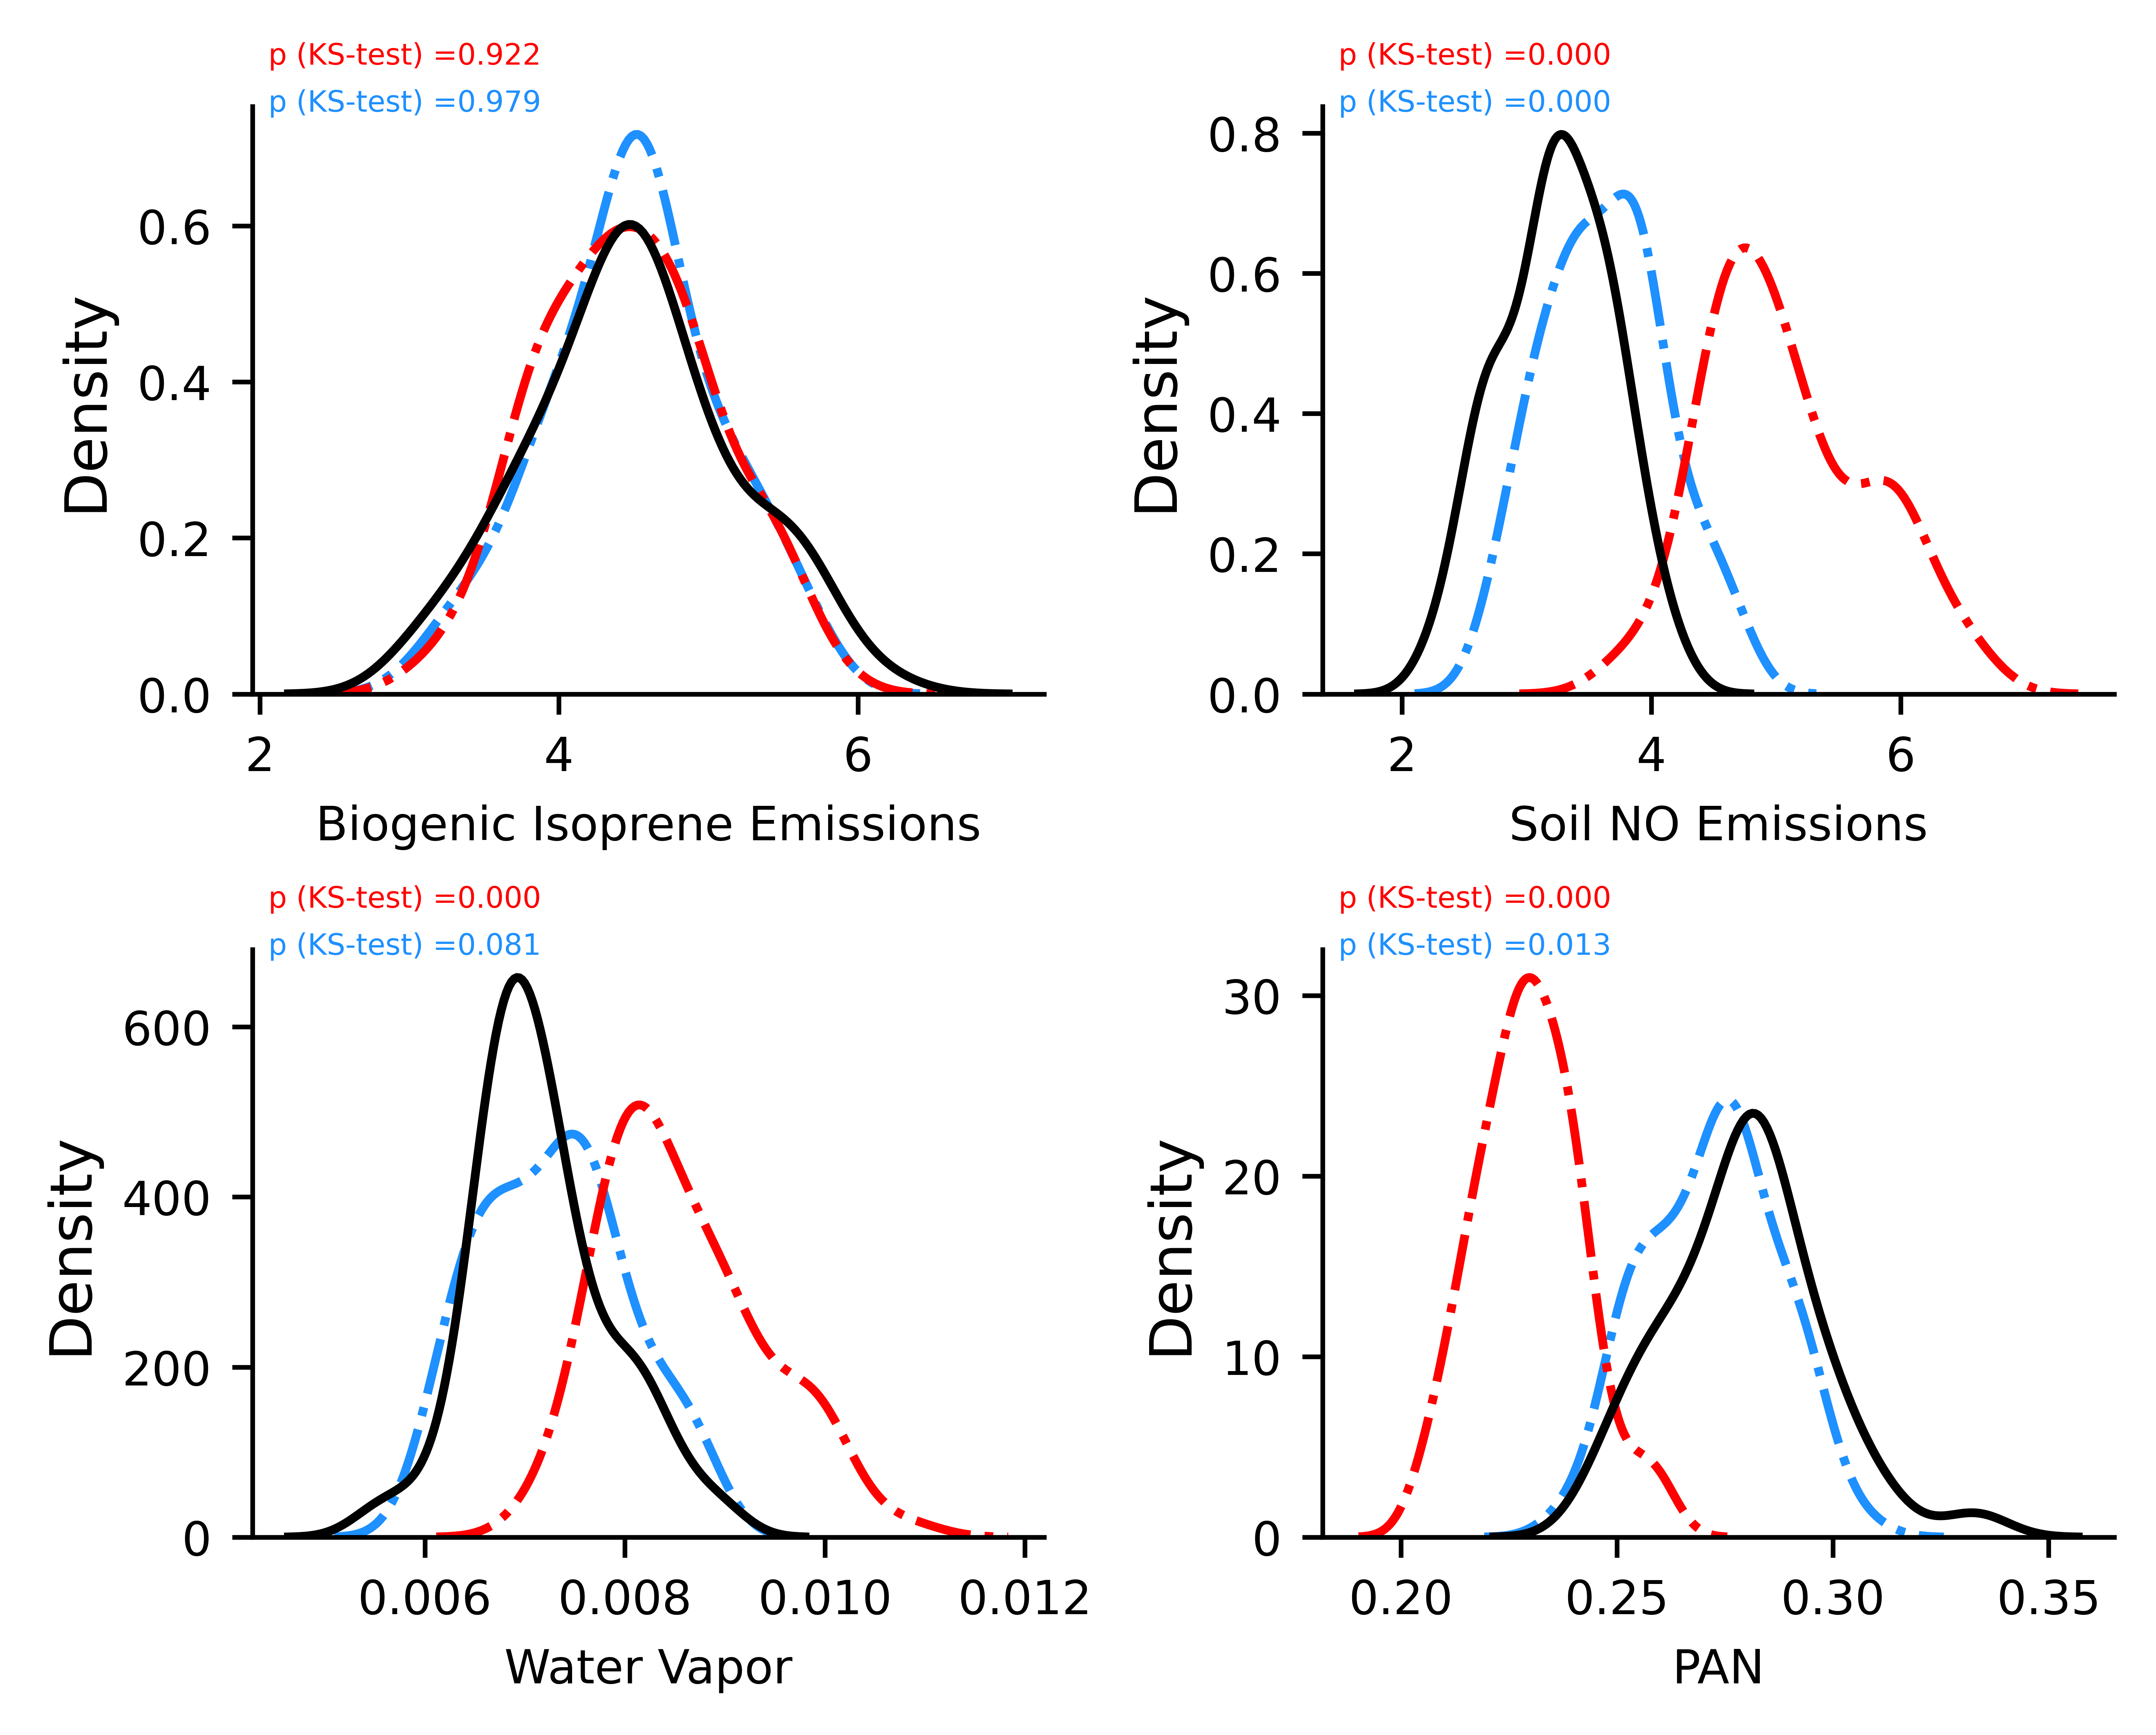

In [43]:
import matplotlib 

matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8)

fig, ax = plt.subplots(
    figsize=(5, 4), 
    dpi=1200, 
    sharex=False, sharey=False,
    nrows=2, ncols=2,
    constrained_layout=True,
)

ax = ax.flatten()


# Biogenic Isoprene
sns.kdeplot(data=psISOP_Biogenic*1e12, ax=ax[0], color='dodgerblue', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rsISOP_Biogenic*1e12, ax=ax[0], color='red', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rISOP_Biogenic*1e12, ax=ax[0], color='black', linestyle='-', fill=False, legend='brief')

ax[0].spines[['right', 'top']].set_visible(False)

_, f_pval_ks = stats.ks_2samp(rISOP_Biogenic, rsISOP_Biogenic)
_, fp_pval_ks = stats.ks_2samp(rISOP_Biogenic, psISOP_Biogenic)

formatted_f_pval_ks = format(f_pval_ks, ".3f")
formatted_fp_pval_ks = format(fp_pval_ks, ".3f")

ax[0].text(.02, 1.11, "p (KS-test) ="+formatted_f_pval_ks, ha='left', va='top', transform=ax[0].transAxes, color='red', fontsize=5)
ax[0].text(.02, 1.03, "p (KS-test) ="+formatted_fp_pval_ks, ha='left', va='top', transform=ax[0].transAxes, color='dodgerblue', fontsize=5)
ax[0].set_xlabel("Biogenic Isoprene Emissions", fontsize=8)


# Soil NO 
sns.kdeplot(data=psSoilNO*1e12, ax=ax[1], color='dodgerblue', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rsSoilNO*1e12, ax=ax[1], color='red', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rSoilNO*1e12, ax=ax[1], color='black', linestyle='-', fill=False, legend='brief')

ax[1].spines[['right', 'top']].set_visible(False)

_, f_pval_ks = stats.ks_2samp(rSoilNO, rsSoilNO)
_, fp_pval_ks = stats.ks_2samp(rSoilNO, psSoilNO)

formatted_f_pval_ks = format(f_pval_ks, ".3f")
formatted_fp_pval_ks = format(fp_pval_ks, ".3f")

ax[1].text(.02, 1.11, "p (KS-test) ="+formatted_f_pval_ks, ha='left', va='top', transform=ax[1].transAxes, color='red', fontsize=5)
ax[1].text(.02, 1.03, "p (KS-test) ="+formatted_fp_pval_ks, ha='left', va='top', transform=ax[1].transAxes, color='dodgerblue', fontsize=5)
ax[1].set_xlabel("Soil NO Emissions", fontsize=8)


# WaterVapor
sns.kdeplot(data=psSpeciesH2O, ax=ax[2], color='dodgerblue', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rsSpeciesH2O, ax=ax[2], color='red', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rSpeciesH2O, ax=ax[2], color='black', linestyle='-', fill=False, legend='brief')

ax[2].spines[['right', 'top']].set_visible(False)

_, f_pval_ks = stats.ks_2samp(rSpeciesH2O, rsSpeciesH2O)
_, fp_pval_ks = stats.ks_2samp(rSpeciesH2O, psSpeciesH2O)

formatted_f_pval_ks = format(f_pval_ks, ".3f")
formatted_fp_pval_ks = format(fp_pval_ks, ".3f")

ax[2].text(.02, 1.11, "p (KS-test) ="+formatted_f_pval_ks, ha='left', va='top', transform=ax[2].transAxes, color='red', fontsize=5)
ax[2].text(.02, 1.03, "p (KS-test) ="+formatted_fp_pval_ks, ha='left', va='top', transform=ax[2].transAxes, color='dodgerblue', fontsize=5)
ax[2].set_xlabel("Water Vapor", fontsize=8)

# PAN
sns.kdeplot(data=psSpeciesPAN*1e9, ax=ax[3], color='dodgerblue', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rsSpeciesPAN*1e9, ax=ax[3], color='red', linestyle='-.', fill=False, legend='brief')
sns.kdeplot(data=rSpeciesPAN*1e9, ax=ax[3], color='black', linestyle='-', fill=False, legend='brief')

ax[3].spines[['right', 'top']].set_visible(False)

_, f_pval_ks = stats.ks_2samp(rSpeciesPAN, rsSpeciesPAN)
_, fp_pval_ks = stats.ks_2samp(rSpeciesPAN, psSpeciesPAN)

formatted_f_pval_ks = format(f_pval_ks, ".3f")
formatted_fp_pval_ks = format(fp_pval_ks, ".3f")

ax[3].text(.02, 1.11, "p (KS-test) ="+formatted_f_pval_ks, ha='left', va='top', transform=ax[3].transAxes, color='red', fontsize=5)
ax[3].text(.02, 1.03, "p (KS-test) ="+formatted_fp_pval_ks, ha='left', va='top', transform=ax[3].transAxes, color='dodgerblue', fontsize=5)
ax[3].set_xlabel("PAN", fontsize=8)




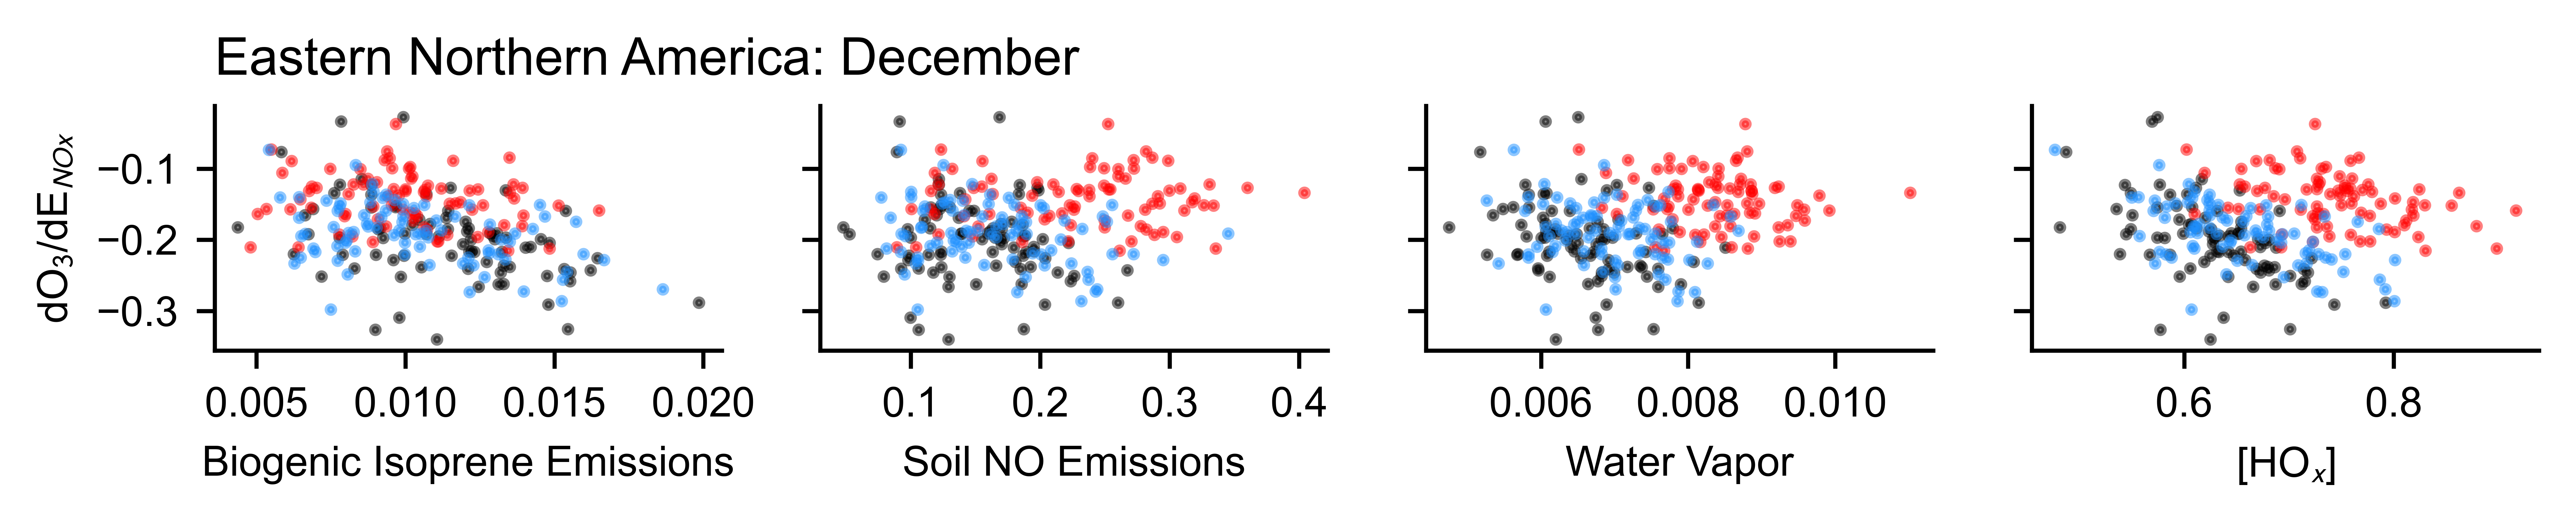

In [175]:
y_r = rSNOx-r
y_rs = rsSNOx-rs
y_ps = psSNOx-ps

y_data = [y_r, y_rs, y_ps]
x1_data = np.asarray([rISOP_Biogenic, rsISOP_Biogenic, psISOP_Biogenic])*1e10
x2_data = np.asarray([rSoilNO, rsSoilNO, psSoilNO])*1e11
x3_data = [rSpeciesH2O, rsSpeciesH2O, psSpeciesH2O]
x4_data = np.asarray([rSpeciesHO2+rSpeciesOH, rsSpeciesHO2+rsSpeciesOH, psSpeciesHO2+psSpeciesOH])*1e12

x_data = [x1_data, x2_data, x3_data, x4_data]
x_labels = ["Biogenic Isoprene Emissions", "Soil NO Emissions", "Water Vapor", "[HO$_x$]"]
fig, axes = plt.subplots(1, 4, figsize=(7, 1.5), sharey=True, dpi=1200)

# Plot scatter plots
for i, ax,  in enumerate(axes):
    my_x_data = x_data[i]
    ax.scatter(my_x_data[0], y_data[0], alpha=0.5, s=2, color='black')
    ax.scatter(my_x_data[1], y_data[1], alpha=0.5, s=2, color='red')
    ax.scatter(my_x_data[2], y_data[2], alpha=0.5, s=2, color='dodgerblue')
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x_labels[i], fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    if i==0:
        ax.set_ylabel("dO$_3$/dE$_{NOx}$", fontsize=8)
        ax.set_title(rf"{region_text}: {month_text}", loc="left", fontsize=10)
    


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()